In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import dataset
bank = pd.read_csv("bill_authentication.csv")

In [4]:
bank.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
X = bank.drop("Class", axis = 1)
y = bank['Class']

In [7]:
X.shape

(1372, 4)

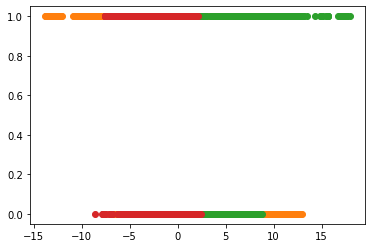

In [12]:
plt.scatter(X['Variance'], y)
plt.scatter(X['Skewness'], y)
plt.scatter(X['Curtosis'], y)
plt.scatter(X['Entropy'], y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [14]:
# linear svm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
y_pred = svc.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[149   3]
 [  1 122]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       152
           1       0.98      0.99      0.98       123

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [34]:
# polynomial kernel
svc_poly = SVC(kernel = 'poly', degree = 2)
svc_poly.fit(X_train, y_train)

SVC(degree=2, kernel='poly')

In [35]:
y_pred = svc_poly.predict(X_test)

In [36]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[145   7]
 [  0 123]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       152
           1       0.95      1.00      0.97       123

    accuracy                           0.97       275
   macro avg       0.97      0.98      0.97       275
weighted avg       0.98      0.97      0.97       275



In [21]:
# rbf kernel
svc_rbf = SVC(kernel = 'rbf')
svc_rbf.fit(X_train, y_train)

SVC()

In [22]:
y_pred = svc_rbf.predict(X_test)

In [23]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[152   0]
 [  0 123]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       123

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [37]:
# conclusion: Gaussian RBF kernel is much better kernels as they are general purpose kernels